In [297]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"




columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']



df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?') 



 
# 결측값 처리 (horsepower 컬럼에 결측값 존재)
df = df.dropna()

해당 소스를 활용하여 연비(Mile per gallen)를 예측 

mse를 구하라



1. ML (RF, DT, LR)

randomforest

2. FCNN

3. 순환데이터로 변환후 CNN



각 단계별 검사후 다음단계 진행

SyntaxError: invalid syntax (2819510736.py, line 18)

In [299]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"




columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','cname']



df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?') 



 
# 결측값 처리 (horsepower 컬럼에 결측값 존재)
df = df.dropna()


C:\Users\soulo\AppData\Local\Temp\ipykernel_976\1265307425.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')


In [300]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,cname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [302]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 초기화
encoder = LabelEncoder()
# 레이블 인코딩 적용
df['cname'] = encoder.fit_transform(df['cname'])

In [305]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 초기화
encoder = LabelEncoder()
# 레이블 인코딩 적용
df['mpg'] = encoder.fit_transform(df['mpg'])

In [307]:

from sklearn.ensemble import RandomForestRegressor
# 특성과 레이블 분리
X = df.drop('mpg', axis=1)
y = df['mpg']

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 생성 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [109]:
# 교차 검증 실행
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)

# 교차 검증 결과 출력
print("교차 검증 RMSE 점수: ", rmse_scores)
print("평균 RMSE: ", rmse_scores.mean())

교차 검증 RMSE 점수:  [ 6.88187925 10.59368554  9.51351838 14.68407615 21.06880706]
평균 RMSE:  12.548393276752549


In [111]:
from sklearn.metrics import mean_squared_error

# 테스트 데이터에 대한 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 125.50069493670885


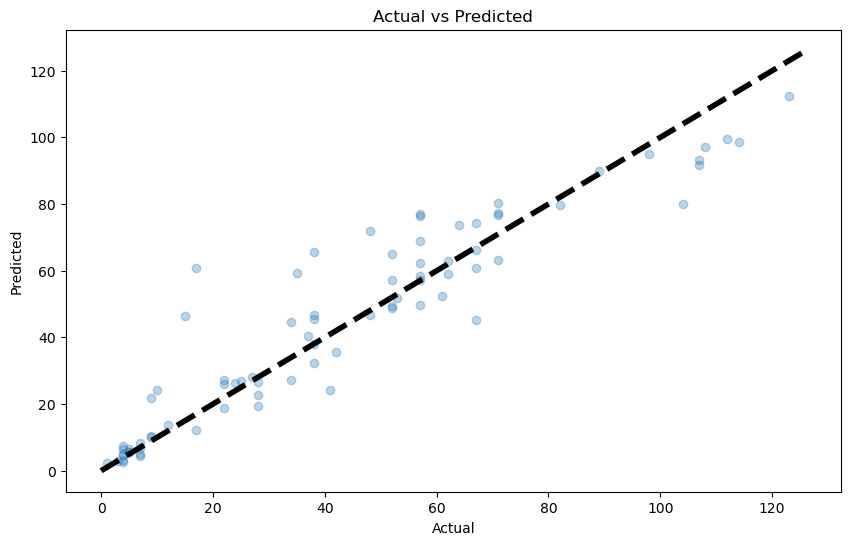

In [113]:
# Rings의 실제값과 예측값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [115]:
# DT 회귀 모델 생성 및 훈련
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [117]:
# 교차 검증 실행
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)

# 교차 검증 결과 출력
print("교차 검증 RMSE 점수: ", rmse_scores)
print("평균 RMSE: ", rmse_scores.mean())

교차 검증 RMSE 점수:  [14.54412753 16.98584668 18.65269624 17.29495258 15.4097871 ]
평균 RMSE:  16.577482023859808


C:\Users\soulo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [119]:
from sklearn.metrics import mean_squared_error

# 테스트 데이터에 대한 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 158.32911392405063


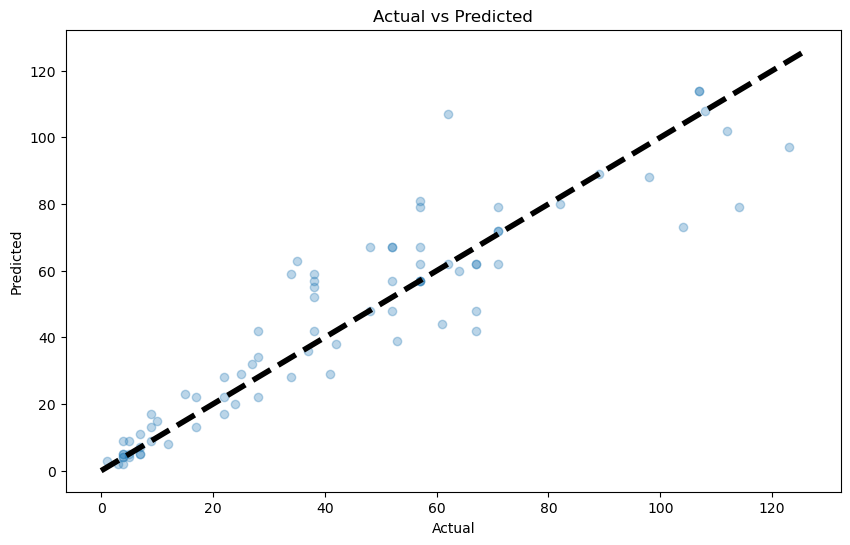

In [121]:
# Rings의 실제값과 예측값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [311]:

# LR 회귀 모델 생성 및 훈련
model = LogisticRegression(n_jobs=5)
model.fit(X_train, y_train)

LogisticRegression(n_jobs=5)

In [312]:
# 교차 검증 실행
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)

# 교차 검증 결과 출력
print("교차 검증 RMSE 점수: ", rmse_scores)
print("평균 RMSE: ", rmse_scores.mean())

C:\Users\soulo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


교차 검증 RMSE 점수:  [22.36011367 23.80405242 23.48267228 22.25522123 28.05626216]
평균 RMSE:  23.991664350365205


In [314]:
from sklearn.metrics import mean_squared_error

# 테스트 데이터에 대한 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 457.873417721519


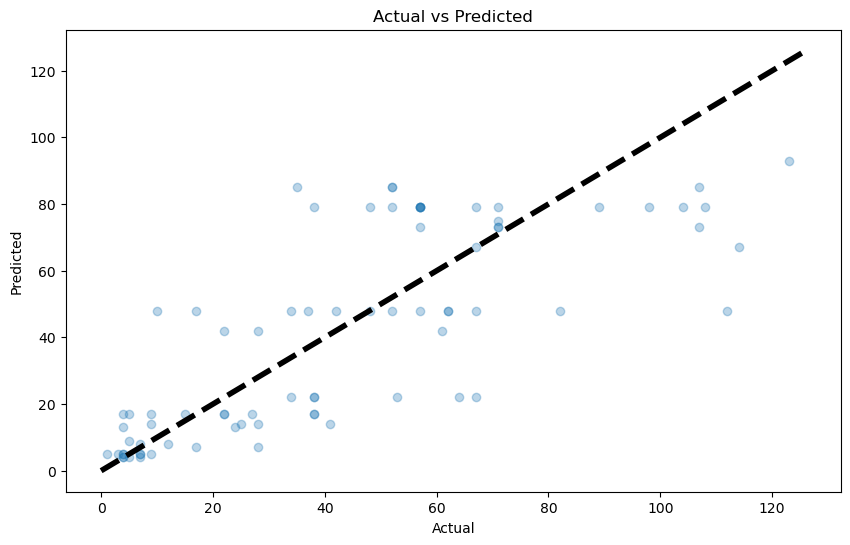

In [315]:
# Rings의 실제값과 예측값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 신경망 모델 구축
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


C:\Users\soulo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3063.2834 - val_loss: 4042.7297
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3079.6221 - val_loss: 3888.1211
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2918.1919 - val_loss: 3658.5466
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2576.8489 - val_loss: 3310.6655
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2590.0454 - val_loss: 2795.0447
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1861.6874 - val_loss: 2119.2881
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1425.6034 - val_loss: 1338.3969
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 835.5354 - val_loss: 683.5692
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 442.2650 - val_loss: 456.4732
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 279.6776 - val_loss: 418.7245
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 352.9687 - val_loss: 343.6656
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


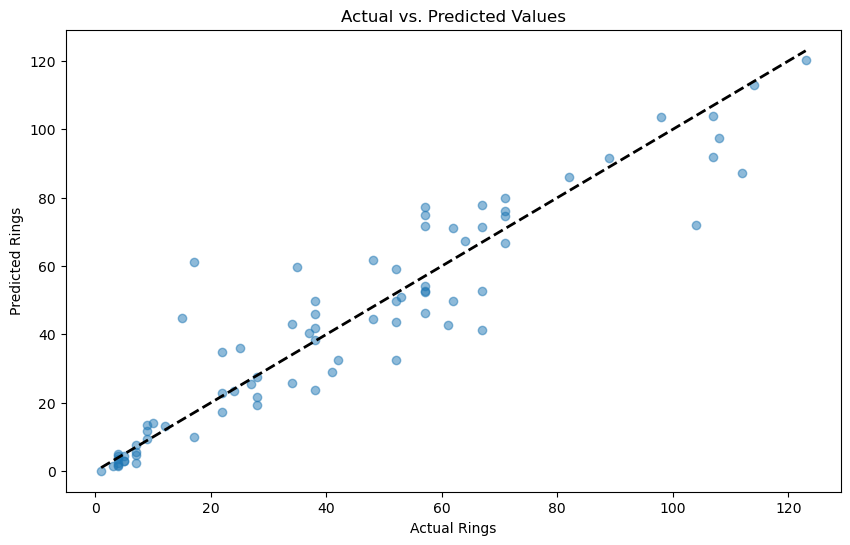

mse: 132.062
R² Score: 0.871


In [158]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 예측
y_pred = model.predict(X_test).flatten()

# 실제 값과 예측 값 비교 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측선
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.show()

# 성능 평가
mse = (mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f'mse: {mse:.3f}')
print(f'R² Score: {r2:.3f}')

In [273]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"




columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','cname']



df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?') 



 
# 결측값 처리 (horsepower 컬럼에 결측값 존재)
df = df.dropna()


C:\Users\soulo\AppData\Local\Temp\ipykernel_976\1265307425.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')


In [274]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 초기화
encoder = LabelEncoder()
# 레이블 인코딩 적용
df['cname'] = encoder.fit_transform(df['cname'])

In [275]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 초기화
encoder = LabelEncoder()
# 레이블 인코딩 적용
df['mpg'] = encoder.fit_transform(df['mpg'])

In [276]:
from sklearn.ensemble import RandomForestRegressor
# 특성과 레이블 분리
X = df.drop('mpg', axis=1)
y = df['mpg'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시퀀스 데이터 생성
def create_sequences(features, target, n_steps):
    X, y = [], []
    for i in range(n_steps, len(features)):
        X.append(features[i-n_steps:i])
        y.append(target[i])
    return np.array(X), np.array(y)

n_steps = 3
X, y = create_sequences(X, y, n_steps)



In [282]:
# 데이터의 형태를 CNN에 적합하게 변환
#X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [290]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

input_layer = Input(shape=(X_train.shape[1], 1))

# CNN과 LSTM 입력 구성
cnn_input = Input(shape=(n_steps, 8))  # 7개 특성을 가진 n_steps 시퀀스
cnn = Conv1D(32, 2, activation='relu')(cnn_input)
cnn = MaxPooling1D(2)(cnn)
cnn = Flatten()(cnn)

lstm_input = Input(shape=(n_steps, 8))  # LSTM은 Rings 시퀀스 처리
lstm = LSTM(50)(lstm_input)

# 결합
combined = concatenate([cnn, lstm])

# 최종 출력(회귀일 경우)
output = Dense(1)(combined)


# 모델 구성
model = Model(inputs=[cnn_input, lstm_input], outputs=output)
model.compile(optimizer='adam', loss='mse')


# 모델 요약
model.summary()

# 모델 훈련
history = model.fit([X_train, X_train], y_train, validation_data=([X_test, X_test], y_test), epochs=50, batch_size=32)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)   │ (None, 3, 8)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_21 (Conv1D)            │ (None, 2, 32)             │             544 │ input_layer_18[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_21              │ (None, 1, 32)             │               0 │ conv1d_21[0][0]            │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_19 (InputLayer)   │ (None, 3, 8)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_9 (Flatten)           │ (None, 32)                │               0 │ max_pooling1d_21[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_2 (LSTM)                 │ (None, 50)                │          11,800 │ input_layer_19[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 82)                │               0 │ flatten_9[0][0],           │
│                               │                           │                 │ lstm_2[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_21 (Dense)              │ (None, 1)                 │              83 │ concatenate_2[0][0]        │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 12,427 (48.54 KB)

 Trainable params: 12,427 (48.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3441.7944 - val_loss: 2059.9993
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2448.1216 - val_loss: 1911.1562
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1877.6666 - val_loss: 1627.1034
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1783.1620 - val_loss: 1362.3259
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1590.4708 - val_loss: 1222.5814
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1356.2694 - val_loss: 1125.7954
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1386.5629 - val_loss: 1022.8199
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1292.6080 - val_loss: 961.6034
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1264.5511 - val_loss: 910.4017
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1088.9371 - val_loss: 932.9053
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1052.4175 - val_loss: 860.6017
Epoch 12/50

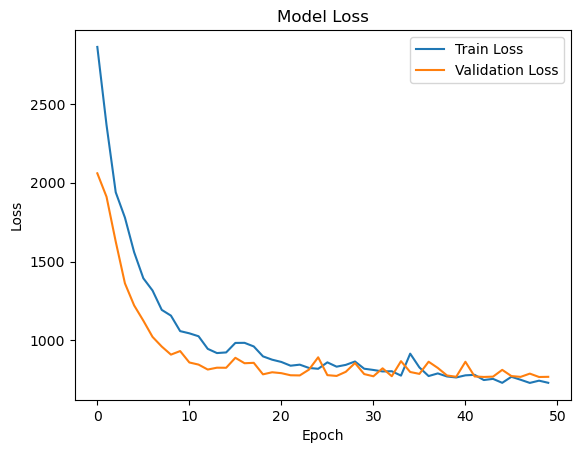

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Mean Squared Error (MSE): 769.6116
Root Mean Squared Error (RMSE): 27.7419
R² Score: 0.3572
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE: 21.742


In [293]:
import matplotlib.pyplot as plt


# 훈련 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 성능 평가
y_pred = model.predict([X_test,X_test]).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

yhat = model.predict([X_test,X_test])
error = mean_absolute_error(y_test, yhat)
print('MSE: %.3f' % error)